In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('../Dataset/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df['country']=df['country'].fillna("Unknown")
df['country']=df['country'].apply(lambda x: x.split(",")[0])


In [6]:



import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        if pd.isnull(country_name):
            return 'Other'
        country_name = country_name.strip()
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continents = {
            'AF': 'Africa',
            'AS': 'Asia',
            'EU': 'Europe',
            'NA': 'North America',
            'OC': 'Oceania',
            'SA': 'South America'
        }
        return continents.get(continent_code, 'Other')
    except:
        return 'Other'

df['region'] = df['country'].apply(country_to_continent)




In [7]:
continent_data = df['region'].value_counts().reset_index()
continent_data.columns = ['Continent', 'Content_Count']


/tmp/ipykernel_19567/282869876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Content_Count', y='Continent', data=continent_data, palette='coolwarm')


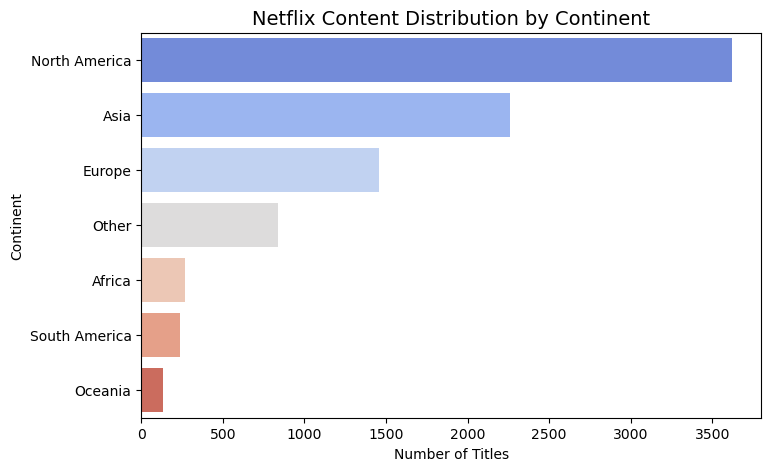

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='Content_Count', y='Continent', data=continent_data, palette='coolwarm')
plt.title('Netflix Content Distribution by Continent', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Continent')
plt.savefig('netflix_content_by_continent.png', bbox_inches='tight')

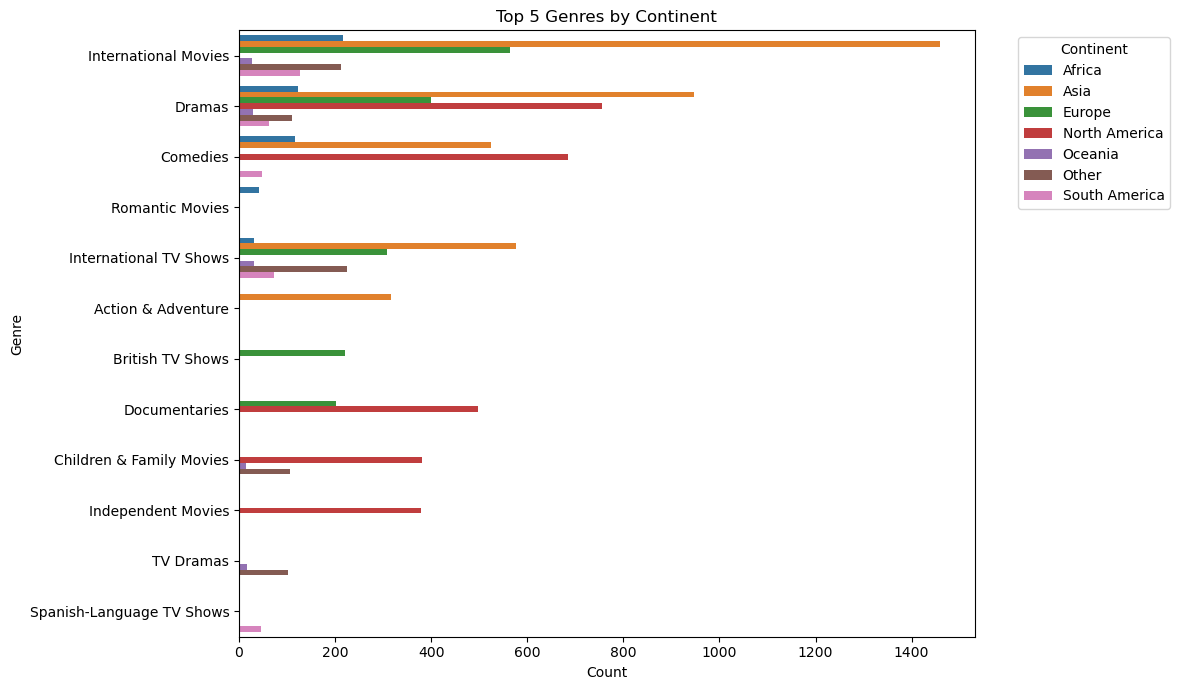

In [10]:
# Split genres and expand into separate rows
df_genre = df.assign(genre=df['listed_in'].str.split(',')).explode('genre')
df_genre['genre'] = df_genre['genre'].str.strip()
genre_counts = df_genre.groupby(['region', 'genre']).size().reset_index(name='count')
top_genres_by_region = genre_counts.sort_values(['region', 'count'], ascending=[True, False])
top_genres_by_region = top_genres_by_region.groupby('region').head(5)
plt.figure(figsize=(12,7))
sns.barplot(data=top_genres_by_region, x='count', y='genre', hue='region')
plt.title('Top 5 Genres by Continent')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('top_genres_by_continent.png')

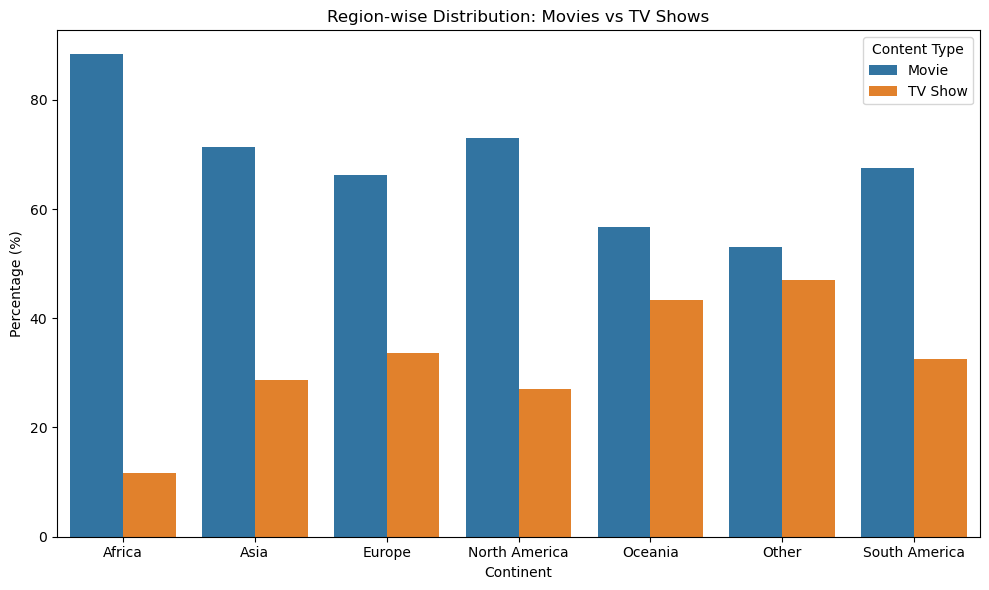

In [13]:
region_type_count = df.groupby(['region', 'type']).size().reset_index(name='count')
region_type_count['percentage'] = region_type_count.groupby('region')['count'].transform(lambda x: 100 * x / x.sum())

plt.figure(figsize=(10,6))
sns.barplot(data=region_type_count, x='region', y='percentage', hue='type')
plt.title('Region-wise Distribution: Movies vs TV Shows')
plt.xlabel('Continent')
plt.ylabel('Percentage (%)')
plt.legend(title='Content Type')
plt.tight_layout()
plt.savefig('region_type_distribution.png')


In [14]:
top_countries=df['country'].value_counts().head(5)
top_countries

country
United States     3211
India             1008
Unknown            831
United Kingdom     628
Canada             271
Name: count, dtype: int64

/tmp/ipykernel_19567/1776857479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country', data=df[df['country'].isin(top_countries.index)], order=top_countries.index, palette='viridis')


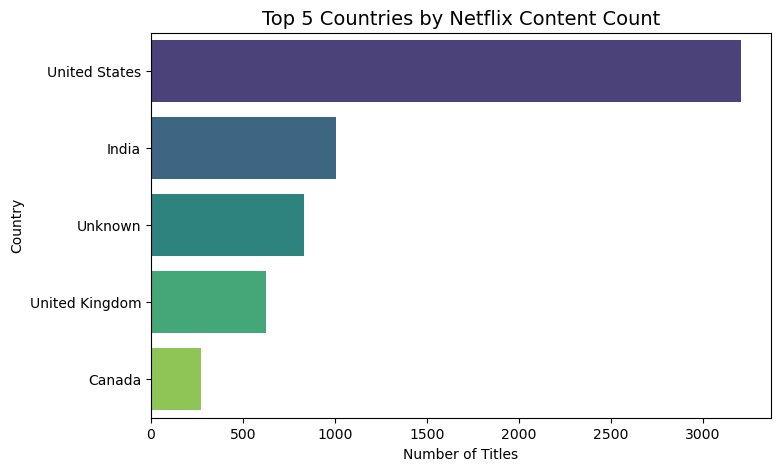

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(y='country', data=df[df['country'].isin(top_countries.index)], order=top_countries.index, palette='viridis')
plt.title('Top 5 Countries by Netflix Content Count', fontsize=14)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.savefig('top_countries_netflix_content.png', bbox_inches='tight')


In [17]:
insights={
    "Aspect":
    [
        "Top Continent by Titles",
        "Top Genres by Continent",
        "Top 5 Countries"
    ],
    "Insight":
    [
        "North America has the highest number of titles.",
        "Dramas are the most popular genre across all continents.",
        "USA, India, UK, Canada, France are top 5 countries."
    ]
}

sum_df=pd.DataFrame(insights)
sum_df
sum_df.to_csv('netflix_analysis_summary.csv', index=False)  